# Analysis of BioImages (in Progress)

This is becoming a collection of Python-based example codes focussing on the analysis of images of biological matter. Check out my website (www.bio-century.net) for more projects, literature recommendations, links to data bases and further inspirations. Apologies for the code often being a little sloppy and "easy-going". Due to a limited time frame, priorities were set to "progress & visualization" instead of "finding the most efficient solution" :) <br>
Whenever a function or method is developed to fulfill the goals, it is outsources into the subfolder "ModulesOwn", take a look and have fun.

# Table of Contents
0. [Reference Table](#ReferenceTable)
1. [First Analysis of Fluorescent Nuclei](#FirstAnalysisOfFluorescentNuclei)
100.   [Appendix](#Appendix)<br>
     1.   [.html-Export of Code](#htmlExportOfCode)

| Abbreviations | Meaning              |
|---------------|----------------------|
| ROI           | Region of Interest |

# 1. <a name="FirstAnalysisOfFluorescentNuclei">First Analysis of Fluorescent Nuclei</a>

Goal:

Detect Mask and count cells on a fluo image

Steps to success:
1. load synthetic cell dataset and groundtruth
2. mask synthetic cells
3. separate between merged multi-nuclei cells and single cells

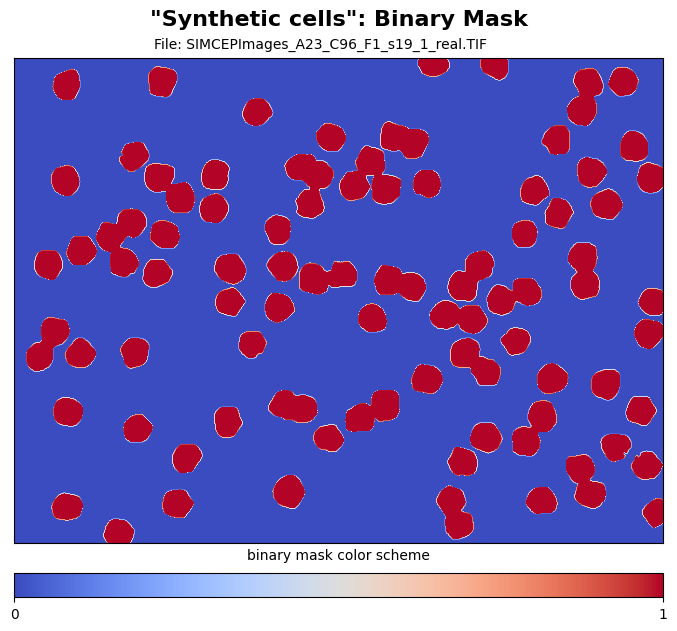

In [1]:
# sources
# https://bbbc.broadinstitute.org/BBBC005
# https://bbbc.broadinstitute.org/search/synthetic%20cells?
# https://www.geeksforgeeks.org/distance-transformation-in-image-python-opencv/
# https://www.geeksforgeeks.org/how-to-adjust-the-position-of-a-matplotlib-colorbar/
# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html
# https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_watershed.html
# https://stackoverflow.com/questions/70361424/extract-white-regions-from-binary-images
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_fill_holes.html
# https://www.tutorialspoint.com/how-to-compute-the-area-and-perimeter-of-an-image-contour-using-opencv-python
# https://www.youtube.com/watch?v=WQpXS9gBEu8

# data source:
# Synthetic cells, Accession number BBBC005 · Version 1
# A. Lehmussola, P. Ruusuvuori, J. Selinummi, H. Huttunen and O. Yli-Harja,
# "Computational Framework for Simulating Fluorescence Microscope Images With Cell Populations,"
# in IEEE Transactions on Medical Imaging, vol. 26, no. 7, pp. 1010-1016, July 2007, doi: 10.1109/TMI.2007.896925.
# 
# A. Lehmussola, P. Ruusuvuori, J. Selinummi, T. Rajala and O. Yli-Harja,
# "Synthetic Images of High-Throughput Microscopy for Validation of Image Analysis Methods,"
# in Proceedings of the IEEE, vol. 96, no. 8, pp. 1348-1360, Aug. 2008, doi: 10.1109/JPROC.2008.925490.

# import modules
import cv2
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy import ndimage

# define filenames and parameters
# fileName           = "SIMCEPImages_A23_C96_F1_s19_w1.TIF"
fileName          = "SIMCEPImages_A23_C96_F1_s19_1_real.TIF"
cellCountTruth     = int(fileName[fileName.find('_C')+2:fileName.find('_F')])
myThresholdValue   = 70

myImage            = cv2.imread('./ModulesExternal/Data/' + fileName)
myImageGray        = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
# ret, thresh        = cv2.threshold(gray, 0, 1, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# fill holes

myImageThresholded                                = np.zeros(myImageGray.shape)
myImageThresholded[myImageGray > myThresholdValue] = 1
myImageThresholded                                = ndimage.binary_fill_holes(myImageThresholded).astype(int)

fig, ax            = plt.subplots(figsize = (15, 7))
im                 = ax.imshow(myImageThresholded, cmap = cm.coolwarm)
divider            = make_axes_locatable(ax)
cax                = divider.new_vertical(size = "5%", pad = 0.3, pack_start = True)
fig.add_axes(cax)
cbar               = fig.colorbar(im, cax = cax, ticks = [-1, 0, 1], orientation = 'horizontal')
TitleString = "\"Synthetic cells\": Binary Mask\n"
plt.title(TitleString, fontweight="bold", fontsize = 16, y = 22.3)
plt.suptitle("File: " + fileName, fontsize = 10, y = 0.91)
ax.set_xlabel("binary mask value")

ax.set_xlabel("binary mask color scheme")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

---------------------------
     Number of Cells
---------------------------
Detected: 		 74
True Value: 		 96
---------------------------
Merged Cells Delta: 	-22


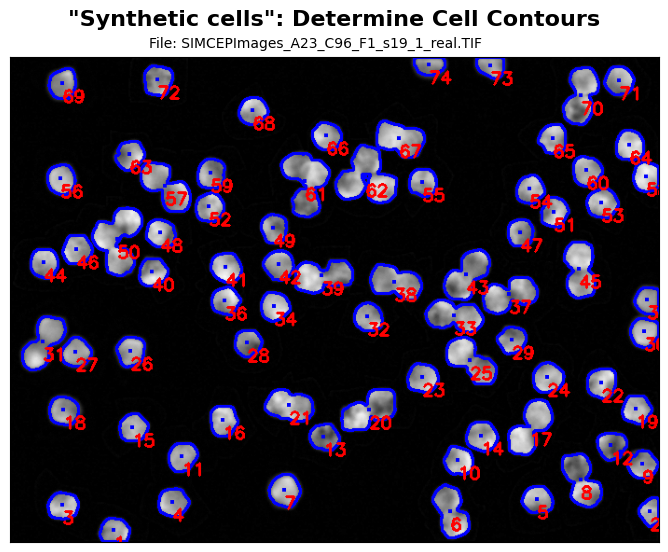

In [2]:
# sources
# https://www.kaggle.com/code/voglinio/separating-nuclei-masks-using-convexity-defects
# https://stackoverflow.com/questions/32401806/get-mask-from-contour-with-opencv
# https://stackoverflow.com/questions/50591442/convert-3-dim-image-array-to-2-dim
# https://www.tutorialspoint.com/how-to-compute-the-area-and-perimeter-of-an-image-contour-using-opencv-python


# import modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import regionprops
import ModulesOwn.A_Groundwork as Groundwork

cellCount, contours, myImageContours, myMaskContoursAll = Groundwork.identifyCellContoursAndAreaOverlays(myImage, myImageThresholded)

print("-" * 27, end = '\n')
print("     Number of Cells")
print("-" * 27, end = '\n')
print("Detected: \t\t " + str(len(contours)))
print("True Value: \t\t " + str(cellCountTruth))
print("-" * 27, end = '\n')
print("Merged Cells Delta: \t" + str(len(contours) - cellCountTruth))

fig, ax = plt.subplots(figsize = (15, 7))
im      = ax.imshow(myImageContours, cmap = cm.coolwarm)
divider = make_axes_locatable(ax)
cax     = divider.new_vertical(size = "5%",
                           pad = 0.3,
                           pack_start = True)
TitleString = "\"Synthetic cells\": Determine Cell Contours\n"
plt.title(TitleString, fontweight="bold", fontsize = 16)
plt.suptitle("File: " + fileName, fontsize = 10, y = 0.91)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


---------------------------
     Number of Cells
---------------------------
Detected previously: 	 74
Detected now: 		 96
True Value: 		 96
---------------------------
Merged cells delta: 	 0


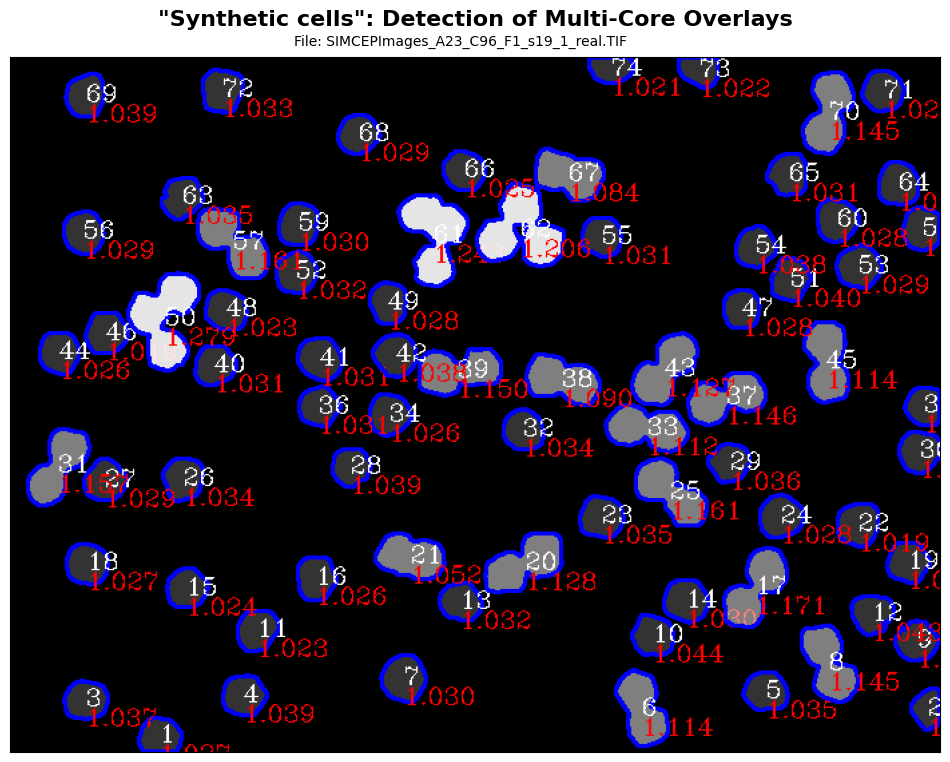

In [3]:
# sources
# https://www.kaggle.com/code/voglinio/separating-nuclei-masks-using-convexity-defects
# https://stackoverflow.com/questions/32401806/get-mask-from-contour-with-opencv
# https://stackoverflow.com/questions/50591442/convert-3-dim-image-array-to-2-dim
# https://www.tutorialspoint.com/how-to-compute-the-area-and-perimeter-of-an-image-contour-using-opencv-python



print("-" * 27, end = '\n')
print("     Number of Cells")
print("-" * 27, end = '\n')
print("Detected previously: \t " + str(len(contours)))
print("Detected now: \t\t " + str(cellCount))
print("True Value: \t\t " + str(cellCountTruth))
print("-" * 27, end = '\n')
print("Merged cells delta: \t " + str(cellCount - cellCountTruth))

fig, ax = plt.subplots(figsize = (15, 7))
fig.set_figwidth(12)
fig.set_figheight(12)
ax.imshow(myMaskContoursAll)
TitleString = "\"Synthetic cells\": Detection of Multi-Core Overlays\n"
plt.title(TitleString, fontweight="bold", fontsize = 16)
plt.suptitle("File: " + fileName, fontsize = 10, y = 0.803)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

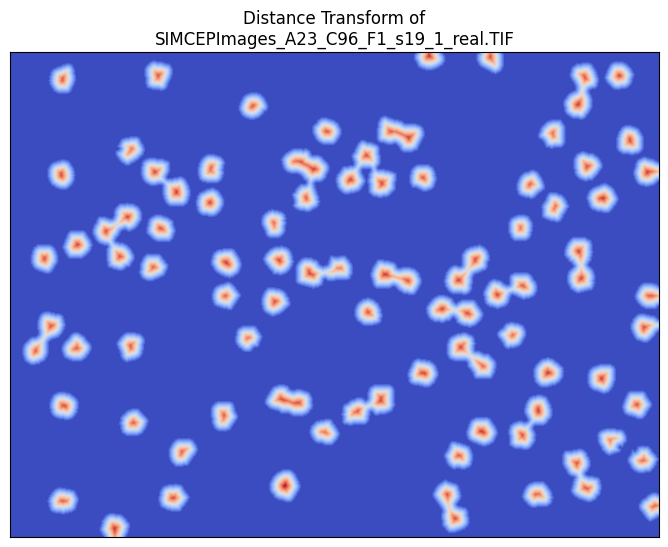

In [4]:
# source
# https://www.geeksforgeeks.org/distance-transformation-in-image-python-opencv/


# import modules
import cv2
import numpy as np

distTransform = cv2.distanceTransform(myImageThresholded.astype(np.uint8), cv2.DIST_L2, 3)
fig, ax = plt.subplots(figsize = (15, 7))
im      = ax.imshow(distTransform, cmap = cm.coolwarm)
divider = make_axes_locatable(ax)
cax     = divider.new_vertical(size = "5%",
                           pad = 0.3,
                           pack_start = True)
ax.set_title("Distance Transform of\n" + fileName)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

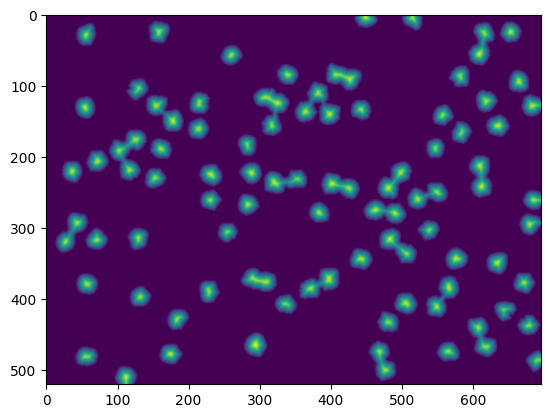

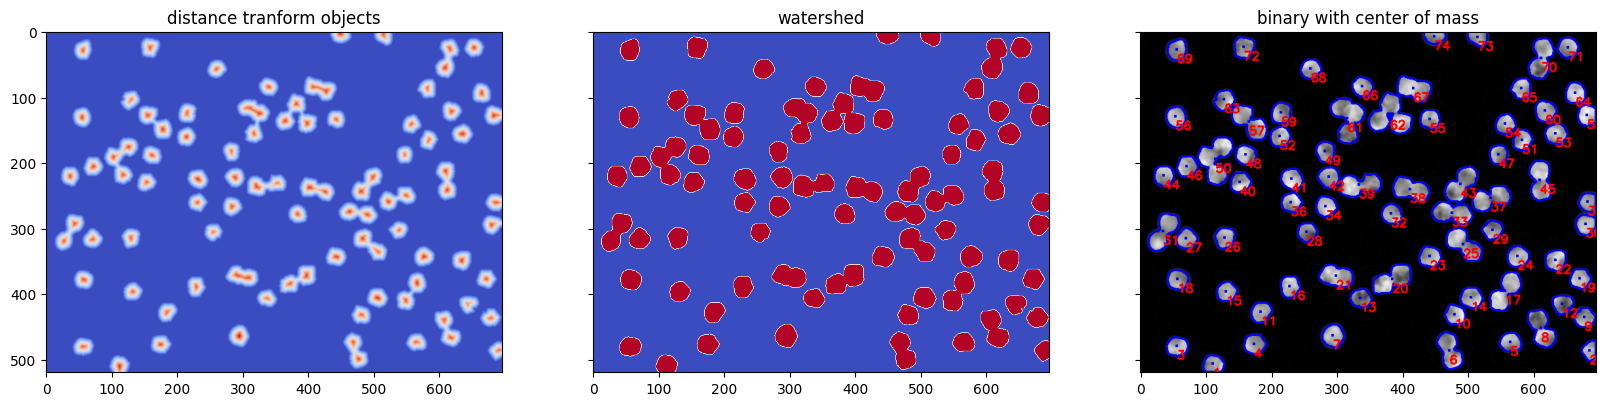

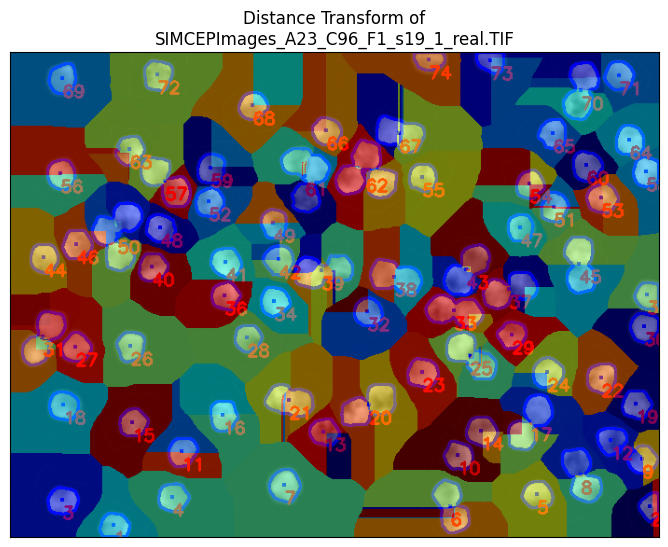

In [5]:
# sources
# https://www.geeksforgeeks.org/distance-transformation-in-image-python-opencv/
# https://gist.github.com/jgomezdans/402500
# https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_watershed.html
# https://stackoverflow.com/questions/31054352/applying-matplotlib-color-map-to-opencv-image
# https://stackoverflow.com/questions/40895785/using-opencv-to-overlay-transparent-image-onto-another-image
# https://stackoverflow.com/questions/60765915/python-opencv-floodfill-function-strange-type-errors
# https://stackoverflow.com/questions/70251361/imextendedmin-and-imimposemin-functions-in-python-for-watershed-seeds-from-dista


# import modules
import codecs, json
import cv2
from matplotlib import cm
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image 
from scipy import ndimage
from skimage.segmentation import watershed


distTransform_t = ndimage.distance_transform_edt(myImageThresholded.astype(np.uint8))
plt.imshow(distTransform_t)
waterShedValues = watershed(- distTransform_t)
fig, axes = plt.subplots(ncols = 3, figsize = (20, 10), sharex = True, sharey = True)
ax = axes.ravel()

ax[0].imshow(distTransform, cmap   = cm.coolwarm)
ax[0].set_title('distance tranform objects')
ax[1].imshow(myImageThresholded, cmap = cm.coolwarm)
ax[1].set_title('watershed')
ax[2].imshow(myImageContours, cmap = cm.coolwarm)
ax[2].set_title('binary with center of mass')

cv2.imwrite('./Figures/cellscontourized.png', myImageContours)
cv2.imwrite('./Figures/distTransform.png', distTransform * 255)
cv2.imwrite('./Figures/watershedvalues.png', waterShedValues)

image_array  = plt.imread("./Figures/watershedvalues.png")

randomValues = np.linspace(0,1,256)
np.random.shuffle(randomValues)
cmap = plt.cm.colors.ListedColormap(plt.cm.jet(randomValues))
dictRandomValues = {}
dictRandomValues["randomValues"] = randomValues.tolist()
with open('./ModulesOwn/cmap.json', 'w') as myFile:
    json.dump(dictRandomValues, myFile)
myFile.close()
imageTmp = Image.fromarray(np.uint8(cmap(image_array)*255))
imageTmp.save('./Figures/watershedvaluesRGB.png')

myBackgroundImage = cv2.imread('./Figures/cellscontourized.png')
myOverlayImage    = cv2.imread('./Figures/watershedvaluesRGB.png')

myBackgroundImage = cv2.addWeighted(myBackgroundImage, 0.5, myOverlayImage, 0.5, 0)

fig, ax = plt.subplots(figsize = (15, 7))
im      = ax.imshow(myBackgroundImage, cmap = cm.coolwarm)
divider = make_axes_locatable(ax)
cax     = divider.new_vertical(size = "5%", pad = 0.3, pack_start = True)
ax.set_title("Distance Transform of\n" + fileName)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

print(cmap)

# 100. <a name="Appendix">Appendix</a>

## 1. <a name="htmlExportOfCode">.html-Export of Code</a>

In [6]:
# export code to html
import os
os.system("jupyter nbconvert AnalysisOfMicrographs.ipynb --to html")

0